> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier-Stokes
======
***

Continuamos nossa jornada para resolver a equação de Navier-Stokes, esse é o Passo 4. Não continue a menos que você tenha completado as tarefas anteriores. Na verdade, esse passo será uma combinação dos dois anteriores \[[2](./02_Passo_2.ipynb),[3](./04_Passo_3.ipynb)\]. O maravilhoso *reaproveitamento de código*!

Passo 4: Equação de Burgers
----
***

Você pode ler mais sobre a equação de Burgers na sua [página wikipedia](http://en.wikipedia.org/wiki/Burgers'_equation).

A equação de Burgers em uma dimensão se parece com:

$$\frac{\partial u(x,t)}{\partial t} + u(x,t) \frac{\partial u(x,t)}{\partial x} = \nu \frac{\partial ^2u(x,t)}{\partial x^2}$$

Como você pode perceber, ela é uma combinação entre convecção não linear e difusão. É surpreendente o quanto você aprende com essa pequena e elegante equação!

Discretizamos a equação usando os mesmos métodos que já foram detalhados nos Passos [1](./01_Passo_1.ipynb) a [3](./04_Passo_3.ipynb). Usando diferença para frente para a derivada temporal, diferença para trás para a derivada espacial de primeira ordem e um esquema de diferença centrada para a derivada segunda. A equação é então escrita como:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

Como antes, uma vez conhecida a condição inicial, a única incógnita é $u_i^{n+1}$. Vamos prosseguir no tempo com:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

### Condição Inicial e de Contorno

Para examinar algumas propriedades interessantes da equação de Burgers, é adequado o uso de condições inicial e de contorno diferentes do que usamos nas tarefas anteriores.

A nossa condição inicial para esse problema agora será:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)
\end{eqnarray}

Que tem solução analítica, dada por:

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Nossa condição de contorno será:

$$u(0) = u(2\pi)$$

Ela é denominada condição de contorno *periódica*. Preste atenção! Isso pode lhe causar certa dor de cabeça se você não tratá-la cuidadosamente.

### Poupando tempo com SymPy

A condição inicial que usaremos para a Equação de Burgers pode ser meio trabalhosa para ser calculada à mão. A derivada $\frac{\partial \phi}{\partial x}$ não é lá muito complicada, mas seria fácil perder um sinal ou esquecer um fator de $x$ em algum lugar, então vamos usar Sympy para nos ajudar.

[SymPy](http://sympy.org/en/) é uma biblioteca Python para metemática simbólica. Ela tem várias das funcionalidades de cálculo simbólico como Mathematica, com o benefício adicional de que podemos facilmente converter os resultados de volta para nosso cálculo em Python (SymPy também é grátis e de código aberto).

Começamos carregando a biblioteca SymPy, em conjunto com nossa biblioteca preferida, Numpy.

In [1]:
import numpy
import sympy

Vamos também informar ao SymPy que nós queremos que todas impressões sejam renderizadas usando $\LaTeX$. Isso vai deixar nosso Notebook incrível!

In [2]:
from sympy import init_printing
init_printing(use_latex=True)

Começamos por definir nossas variáveis simbólicas para as três variáveis presentes na nossa condição inicial e então digitar a equação completa para $\phi$. Vamos obter uma versão satisfatoriamente renderizada para nossa equação para $\phi$.

In [3]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t)**2 / (4 * nu * (t + 1))) +
       sympy.exp(-(x - 4 * t - 2 * sympy.pi)**2 / (4 * nu * (t + 1))))
phi

Ela parece um pouco pequena, mas está tudo em ordem. Agora, obter a derivada parcial $\frac{\partial \phi}{\partial x}$ é uma tarefa trivial.

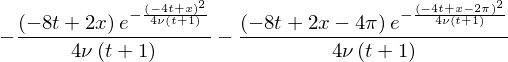

In [5]:
phiprime = phi.diff(x)
phiprime

Se você quiser ver a versão não rederizada, basta apenas usar o comando `print()`.

In [6]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


### E agora?

Uma vez que temos a versão *Pythonica* da nossa derivada, podemos terminar de escrever a condição inicial completa e então traduzir ela para uma expressão Python utilizável. Para tanto, usaremos a função *lambdify*, que toma uma equação simbólica do SymPy e a transforma em uma função invocável. 

In [7]:
from sympy.utilities.lambdify import lambdify

u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


### Lambdify

Para que lambdify transforme a expressão em uma função invocável, dizemos ao lambdify quais variáveis deve solicitar e a equação na qual queremos conectá-la.

In [8]:
ufunc = lambdify((t, x, nu), u)
print(ufunc(1, 4, 3))

3.49170664206445


### De volta à equação de Burgers 

Agora que temos a condição inicial preparada, podemos prosseguir para finalizar nosso problema. Podemos exibir nossa condição inicial no gráfico da condição inicial (CI) usando nossa função lambdify.

In [9]:
from matplotlib import pyplot
%matplotlib inline

###Declaração de variáveis
nx = 101
nt = 100
dx = 2. * numpy.pi / (nx - 1)
nu = .07
dt = dx * nu

x = numpy.linspace(0, 2 * numpy.pi, nx)
un = numpy.empty(nx)
t = 0

u = numpy.asarray([ufunc(t, x0, nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

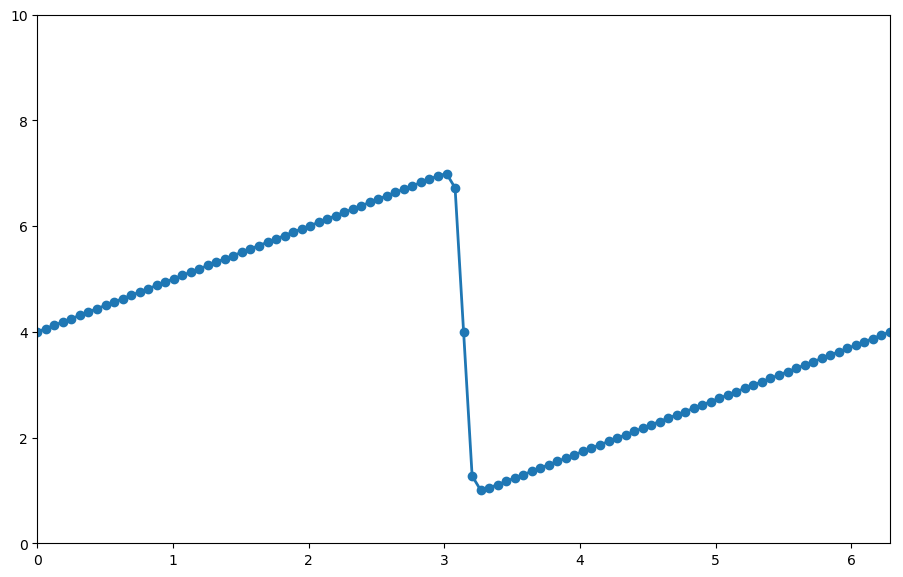

In [10]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x, u, marker='o', lw=2)
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10]);

Essa definitivamente não é a função chapéu com a qual viemos lidando até agora. Chamamo ela de *função dente de serra* ("saw-tooth function"). Seguimos adiante para ver o que acontece. 

### Condição de Contorno Periódica

Uma das grandes diferenças entre o Passo 4 e as lições anteriores é o emprego da condição de contorno *periódica*. Se você experimentar diferentes parâmetros nos Passos 1 e 2 e tentar executar as simulações por mais tempo (aumentando `nt`) vai notar que a onda inicial vai continuar se movendo para a direita até que ela não mais sequer aparece no gráfico.

Com condições de contorno periódicas, quando um ponto chega ao lado direito do domínio, ele *contorna* de volta para o início do domínio.

Apressentamos novamente a equação discretizada que desenvolvemos no início desse notebook:

$$
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)
$$

Qual o *significado* de $u_{i+1}^n$ quando $i$ já está ao final do domínio?

Pense sobre isso por um minuto antes de proceguir.

In [11]:
for n in range(nt): #Laço temporal
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] - un[i] * dt / dx *(un[i] - un[i-1]) + nu * dt / dx**2 *\
                (un[i+1] - 2 * un[i] + un[i-1])
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu * dt / dx**2 *\
                (un[1] - 2 * un[0] + un[-2])
    u[-1] = u[0]
        
u_analytical = numpy.asarray([ufunc(nt * dt, xi, nu) for xi in x])

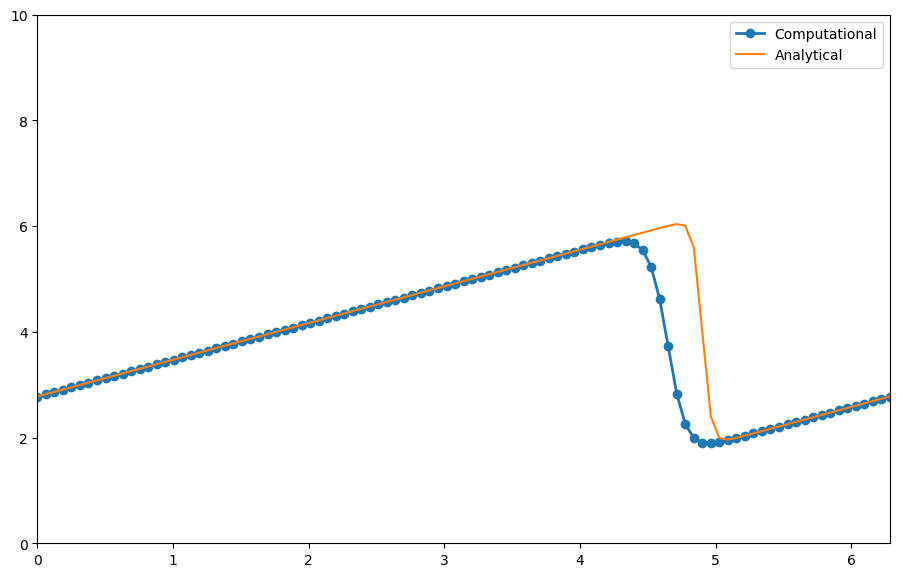

In [12]:
pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.plot(x,u, marker='o', lw=2, label='Computacional')
pyplot.plot(x, u_analytical, label='Analítico')
pyplot.xlim([0, 2 * numpy.pi])
pyplot.ylim([0, 10])
pyplot.legend();

***

O que vem agora?
----

Os Passos que seguem, do 5 ao 12, serão considerados em duas dimensões. Mas será fácil extender os esquemas 1D de diferenças finitas para 2D ou 3D. Apenas aplique a definição: uma derivada parcial com respeiro a $x$ é a variação na direção $x$ *enquanto mantemos $y$ constante*.

Antes de proceguir para o [Passo 5](./07_Passo_5.ipynb), tenha certeza que tenha completado seu próprio código para os Passos 1 à 4, e que tenha experimentado diferentes combinações de parâmetros e refletido sobre o que está acontecendo. Adicionalmente, recomendamos que faça uma pequena pausa para aprender sobre [operações com arranjos com NumPy](./06_Operacoes_de_arranjos_com_NumPy.ipynb).

In [13]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).